# Downloading data from GEO

The Gene Expression Omnibus (GEO) is a website funded by the NIH to store the expression data associated with papers. Many papers require you to submit your data to GEO 

Search [GEO](http://www.ncbi.nlm.nih.gov/geo) for the accession ID from [Shalek + Satija 2013](http://www.ncbi.nlm.nih.gov/pubmed/23685454). **Download the "Series Matrix" to your laptop** and **copy the link for the `GSE41265_allGenesTPM.txt.gz`" file**. All the "Series" file formats contain the same information in different formats. The Matrix one is the easiest to understand.

Open the "Series Matrix" in Excel (or equivalent) on your laptop. And look at the format and what's described.

In [3]:
! wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz

--2016-01-26 09:18:46--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/suppl/GSE41265_allGenesTPM.txt.gz
           => “GSE41265_allGenesTPM.txt.gz.1”
Resolving ftp.ncbi.nlm.nih.gov... 130.14.250.10, 2607:f220:41e:250::13
Connecting to ftp.ncbi.nlm.nih.gov|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE41nnn/GSE41265/suppl ... done.
==> SIZE GSE41265_allGenesTPM.txt.gz ... 1099290
==> PASV ... done.    ==> RETR GSE41265_allGenesTPM.txt.gz ... done.
Length: 1099290 (1.0M) (unauthoritative)

100%[======================================>] 1,099,290   1.65M/s   in 0.6s    

2016-01-26 09:18:49 (1.65 MB/s) - “GSE41265_allGenesTPM.txt.gz.1” saved [1099290]



In [4]:
# Dataframes in Python
import pandas as pd

# Statistical plotting library we'll use
import seaborn as sns

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

# Read the data table
geo_expression = pd.read_table('GSE41265_allGenesTPM.txt.gz', 
                               
                               # Sets the first (Python starts counting from 0 not 1) column as the row names
                               index_col=0, 
                               
                               # Tells pandas to decompress the gzipped file
                               compression='gzip')

Let's look at the top of the dataframe by using `head()`. By default, this shows the first 5 rows.

In [5]:
geo_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


To specify a certain number of rows, put a number between the parentheses.

In [6]:
geo_expression.head(10)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000
6530411M01RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Exercise 1

Show the first 17 rows of `geo_expression`

In [7]:
geo_expression.head(17)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,...,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,...,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,...,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000
6530411M01RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


A very quick and dirty way to get an initial look at the data is by performing Pearson correlation on the data. We'll use the `.corr()` method on the DataFrame  for correlating, and the default is the Pearson correlation.

In [8]:
correlation = geo_expression.corr()
print(correlation.shape)
correlation

(21, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
S1,1.000000,0.615496,0.861539,0.570572,0.768985,0.560066,0.801955,0.591814,0.429668,0.710020,...,0.112975,0.204277,0.513468,0.444124,0.245848,0.406933,0.766247,0.677613,0.651003,0.652713
S2,0.615496,1.000000,0.690677,0.711010,0.801514,0.811989,0.710402,0.693528,0.694220,0.669676,...,0.202102,0.400702,0.701739,0.768733,0.478051,0.578336,0.737657,0.709951,0.704000,0.709001
S3,0.861539,0.690677,1.000000,0.627710,0.807838,0.762753,0.932418,0.552351,0.481959,0.725774,...,0.189158,0.318428,0.535996,0.581316,0.402456,0.553760,0.949758,0.725906,0.706786,0.706942
S4,0.570572,0.711010,0.627710,1.000000,0.849018,0.805193,0.586841,0.855467,0.704858,0.787894,...,0.083493,0.172587,0.875280,0.767342,0.250388,0.807362,0.686906,0.724686,0.732824,0.730461
S5,0.768985,0.801514,0.807838,0.849018,1.000000,0.829465,0.775802,0.719581,0.668513,0.806874,...,0.162581,0.253004,0.746245,0.735414,0.320478,0.619588,0.817384,0.773020,0.769290,0.771817
S6,0.560066,0.811989,0.762753,0.805193,0.829465,1.000000,0.815358,0.753739,0.711262,0.742324,...,0.227714,0.405710,0.793828,0.879951,0.526813,0.728710,0.862921,0.764114,0.769273,0.771557
S7,0.801955,0.710402,0.932418,0.586841,0.775802,0.815358,1.000000,0.574673,0.515644,0.686867,...,0.210230,0.357594,0.530274,0.684829,0.477747,0.539080,0.941505,0.719506,0.703540,0.708822
S8,0.591814,0.693528,0.552351,0.855467,0.719581,0.753739,0.574673,1.000000,0.643753,0.690301,...,0.126396,0.219242,0.877610,0.750182,0.274952,0.762292,0.633224,0.723017,0.728791,0.729632
S9,0.429668,0.694220,0.481959,0.704858,0.668513,0.711262,0.515644,0.643753,1.000000,0.555630,...,0.329514,0.462955,0.674974,0.812689,0.574147,0.605888,0.579601,0.654613,0.661064,0.665470
S10,0.710020,0.669676,0.725774,0.787894,0.806874,0.742324,0.686867,0.690301,0.555630,1.000000,...,0.109633,0.199645,0.826020,0.652039,0.223070,0.632843,0.743300,0.681138,0.681125,0.680949


We can look at this correlation data in two ways:

1. Simple heatmap
2. Super cool and awesome clustered heatmap

### Simple Heatmap

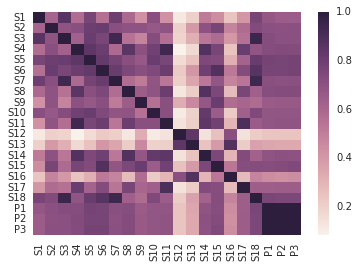

In [9]:
sns.heatmap(correlation)

### Super cool and awesome clustered heatmap

/Users/olga/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


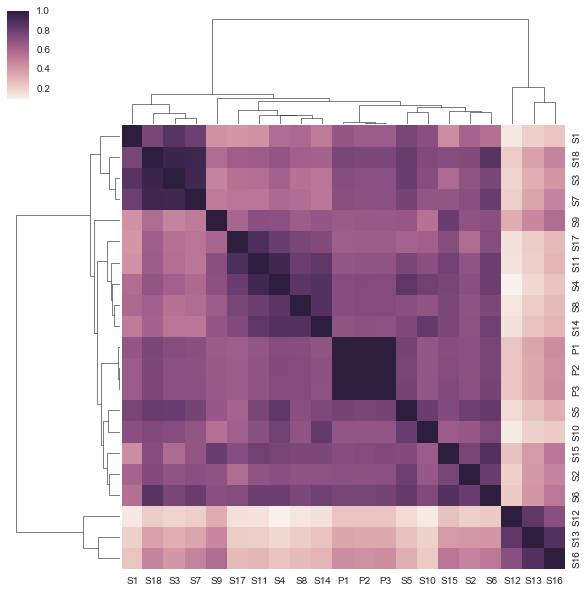

In [9]:
sns.clustermap(correlation)

For the next step, we want just the single cells. We're going to pull out just the single cells - which are conveniently labeled as "S#". We'll do this using a [list comprehension](http://www.pythonforbeginners.com/basics/list-comprehensions-in-python), which means we'll create a new list based on the items in `geo_expression.columns` and whether or not they start with the letter `'S'`.

In [10]:
single_ids = [x for x in geo_expression.columns if x.startswith('S')]
single_ids

['S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18']

We'll access the columns we want using this bracket notation (note this only works for columns)

In [12]:
geo_singles = geo_expression[single_ids]

## Exercise 2

Look at the first few rows of `geo_singles`. Does it only have the single cells?

In [ ]:
# Your code here

## Exercise 3

You now know which three cells are different from the rest, according to the paper. Label the cells as "Mature" and "Maturing" by replacing `None` below with either `"Mature"` or `"Maturing"`. We will use this `groupby` [dictionary](http://learnpythonthehardway.org/book/ex39.html) to match the sample IDs to their specific group. The "S1" cell has been done for you as an example.

In [14]:
groupby = {'S1': "Maturing",
 'S10': None,
 'S11': None,
 'S12': None,
 'S13': None,
 'S14': None,
 'S15': None,
 'S16': None,
 'S17': None,
 'S18': None,
 'S2': None,
 'S3': None,
 'S4': None,
 'S5': None,
 'S6': None,
 'S7': None,
 'S8': None,
 'S9': None}